<a href="https://colab.research.google.com/github/manasa-27/manasamente/blob/main/Airbnb1_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the Dataset**

In [ ]:
airbnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb Analysis - Bosu babu/Airbnb NYC 2019.csv')

**Checking the Total Number of Rows and Columns**

In [ ]:
airbnb_df.shape

(48895, 16)

Looking to know the Datatypes

In [ ]:
# Dataset information
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Dropping the columns** 

In [ ]:
airbnb_df1=airbnb_df.drop(airbnb_df.columns[[6,7,12,13]], axis=1, inplace=True)

Dropping the Nullvalues

In [ ]:
airbnb_df1 = airbnb_df.dropna()

In [ ]:
airbnb_df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


**Reading the dataset after dropping the columns.**

In [ ]:
airbnb_df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
airbnb_df1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


**Checking for the null values if any**.

In [ ]:
airbnb_df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**By the use of unique() function we can find total estimate total number of places.**

In [ ]:
airbnb_df1.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

By the use of Value_counts() method we can find the total count of the places individually

In [ ]:
#neighbourhood_group value counts 
airbnb_df1.neighbourhood_group.value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

**The above observations show that Manhattan and Brooklyn have more rooms when compared to other two places.**

By use of unique() function we found the different categories of rooms

In [ ]:
airbnb_df1.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**This shows the three various categories of rooms in airbnb dataset**

 **What can we learn about different hosts and areas?**

---


 To know the details of hosts and areas we are considering to group host_name, neighbourhood_group and the host_listings_count  columns using groupby() function.
 
   To find the maximum value in the iterable, max()function is used.

In [ ]:
airbnb_df1_q1 = airbnb_df1.groupby(["host_name","neighbourhood_group"])["calculated_host_listings_count"].max().reset_index()
airbnb_df1_q1.nlargest(10,"calculated_host_listings_count").reset_index(drop=True)

,host_name,neighbourhood_group,calculated_host_listings_count
0,Sonder (NYC),Manhattan,327
1,Blueground,Brooklyn,232
2,Blueground,Manhattan,232
3,Kara,Manhattan,121
4,Kazuya,Brooklyn,103
5,Kazuya,Manhattan,103
6,Kazuya,Queens,103
7,Jeremy & Laura,Manhattan,96
8,Sonder,Manhattan,96
9,Corporate Housing,Manhattan,91


Cleaning the data by using drop() function for better accuracy

In [ ]:
airbnb_v1 = airbnb_df1_q1.drop(["host_name"],axis=1)

 **Visualizing the data to figure out the relationship between areas and host listings**

<Figure size 720x720 with 0 Axes>

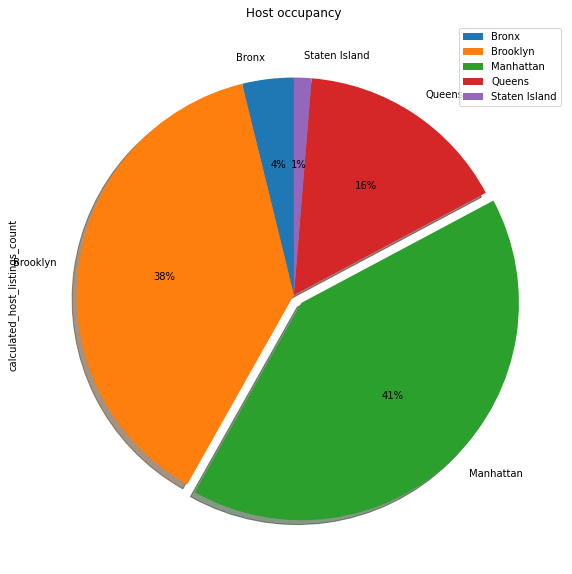

<Figure size 720x720 with 0 Axes>

In [ ]:
explode = (0,0,.05,0,0)
airbnb_v1.groupby(['neighbourhood_group']).sum().plot(kind='pie',explode=explode,figsize=(10, 10), y='calculated_host_listings_count',shadow=True,startangle=90, autopct='%1.0f%%',title='Host occupancy')
plt.figure(figsize=(10, 10))

From the above graph we can say that Manhattan and Brooklyn have highest number of room bookings and Staten Island and Bronx have lowest number of room bookings where as Queens have mediun number of room bookings.

**Busiest hosts and why?**

Using the groupby() function and colliding all the required data 

In [ ]:
airbnb_hosts_buzy = airbnb_df1.groupby(by=["host_name","host_id","neighbourhood_group","room_type"])["calculated_host_listings_count"].max().reset_index()

Using the Sort_Values() function to sort the data individually based on the number_of_reviews given by customer

In [ ]:
top_bzy_hosts_df = airbnb_hosts_buzy.sort_values(by="calculated_host_listings_count", ascending=False).reset_index(drop=True).head(10)
top_bzy_hosts_df

,host_name,host_id,neighbourhood_group,room_type,calculated_host_listings_count
0,Sonder (NYC),219517861,Manhattan,Private room,327
1,Sonder (NYC),219517861,Manhattan,Entire home/apt,327
2,Blueground,107434423,Brooklyn,Entire home/apt,232
3,Blueground,107434423,Manhattan,Entire home/apt,232
4,Kara,30283594,Manhattan,Entire home/apt,121
5,Kazuya,137358866,Brooklyn,Private room,103
6,Kazuya,137358866,Manhattan,Entire home/apt,103
7,Kazuya,137358866,Manhattan,Private room,103
8,Kazuya,137358866,Queens,Private room,103
9,Sonder,12243051,Manhattan,Entire home/apt,96


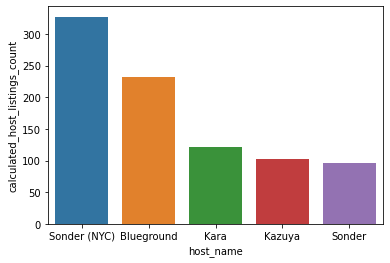

In [ ]:
bzy_hst=sns.barplot(x='host_name', y='calculated_host_listings_count', data=top_bzy_hosts_df)
plt.show()

In [ ]:
airbnb_hosts_buzy2 = airbnb_df1.groupby(by=["host_name","host_id","neighbourhood_group","room_type"])["number_of_reviews"].max().reset_index()
top_bzy_hosts_df2 = airbnb_hosts_buzy2.sort_values(by="number_of_reviews", ascending=False).reset_index(drop=True).head(10)
top_bzy_hosts_df2

,host_name,host_id,neighbourhood_group,room_type,number_of_reviews
0,Dona,47621202,Queens,Private room,629
1,Jj,4734398,Manhattan,Private room,607
2,Maya,37312959,Queens,Private room,543
3,Carol,2369681,Manhattan,Private room,540
4,Danielle,26432133,Queens,Private room,510
5,Asa,12949460,Brooklyn,Entire home/apt,488
6,Wanda,792159,Brooklyn,Private room,480
7,Linda,2680820,Queens,Private room,474
8,Dani,42273,Brooklyn,Entire home/apt,467
9,Angela,23591164,Queens,Private room,466


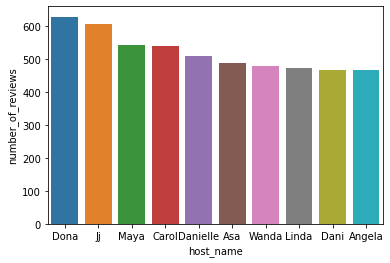

In [ ]:
bzy_hst2=sns.barplot(x='host_name', y='number_of_reviews', data=top_bzy_hosts_df2)
plt.show()

**Lets do a simple analysis on neighbourhood_group versus count, which will give some insights about popular neighbourhoods.**

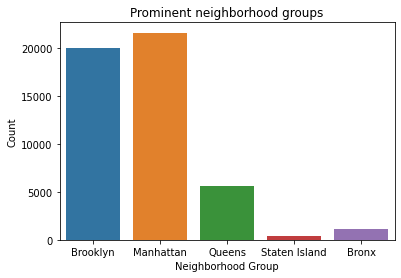

In [ ]:
plt1 = sns.countplot(x="neighbourhood_group", data=airbnb_df1)
plt.title('Prominent neighborhood groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.show()

From the above graph we can say that Manhattan and Brooklyn are more prominent places,Staten Island and Bronx are less prominent places where as Queens have mediumly prominent .

Using the box plot for better understanding of data

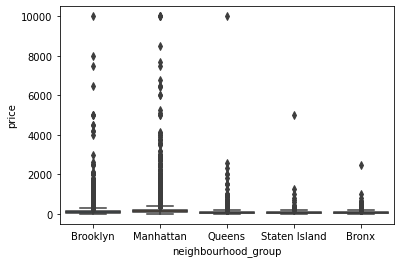

In [ ]:
sns.boxplot(x='neighbourhood_group',y='price',data =airbnb_df1)
plt.show()

From the above graph we can conclude that Manhattan and Brooklyn are the areas with the highest price. The price range is similar for the other three in neighbourhood.



In [ ]:
room_price_df= airbnb_df1.groupby(["room_type"])['price'].mean().reset_index()
room_price_df

,room_type,price
0,Entire home/apt,211.806994
1,Private room,89.794360
2,Shared room,70.075928


**Lets plot a box plot for Cost Estimation of Room Type**

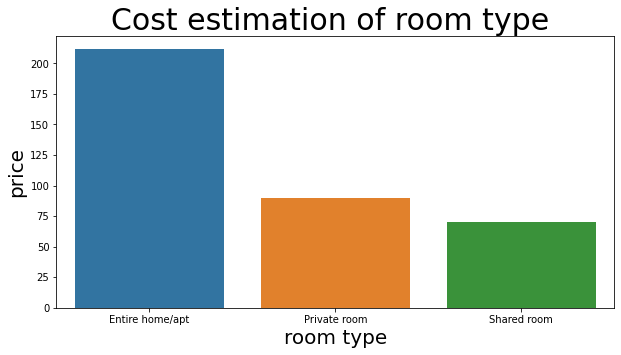

In [ ]:
fig = plt.figure(figsize=(10,5))
plt2 = sns.barplot(x=room_price_df.room_type, y=room_price_df.price) 
plt2.set_xlabel("room type",fontsize=20)
plt2.set_ylabel("price",fontsize=20)
plt2.set_title("Cost estimation of room type ",fontsize=30)
plt.show()

**Observations**

Shared rooms are very cheap as compared to Entire home/apt,
Private rooms. Private rooms are little costlier than shared rooms.
Entire home/apt is very expensive than all others 

**Bar graph for reviews on room type vs number of reviews**

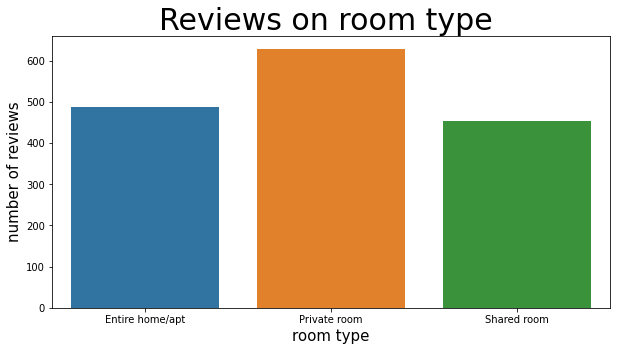

In [ ]:
fig = plt.figure(figsize=(10,5))
reviews_by_type = airbnb_df1[["room_type","number_of_reviews"]].groupby(by="room_type")["number_of_reviews"].max().reset_index()
plt3=sns.barplot(x=reviews_by_type.room_type,y=reviews_by_type.number_of_reviews)
plt3.set_xlabel("room type",fontsize=15)
plt3.set_ylabel("number of reviews",fontsize=15)
plt3.set_title("Reviews on room type ",fontsize=30)
plt.show()

**Obsevations:**
**The plot shows that the occupancy in private room is higher representing the importance of privacy by people. Therefore, quite number of people prefer private room over shared or entire home/apt.**



  **What can we learn from predictions!
Lets perform analysis on median price in different areas  

***Obtain the median price ***

In [ ]:
area_price_df = airbnb_df1.groupby(by="neighbourhood_group").agg({"price":"median"}).reset_index()
area_price_df

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


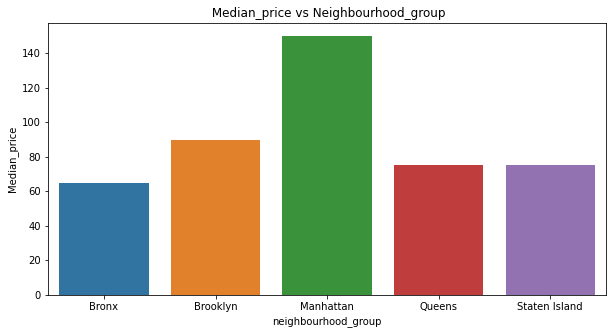

In [ ]:
plt.figure(figsize=(10,5))
plt4 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = area_price_df )
plt4.set_title(' Median_price vs Neighbourhood_group')
plt4.set_xlabel('neighbourhood_group')
plt4.set_ylabel("Median_price")
plt.show()

Observation:
'Manhattan' is the area having highest median price,followed by Brooklyn.So we can say that most costly hosts are situated in "Manhattan".

**Lets find the Relation between neighbourgroup and Availability of Room **

In [ ]:
airbnb_df1.availability_365.max()

365

In [ ]:
fig = plt.figure(figsize=(10,5))
availability_by_area = airbnb_df1[["neighbourhood_group","availability_365"]].groupby(by="neighbourhood_group")["availability_365"].median().sort_values().reset_index()
availability_by_area

,neighbourhood_group,availability_365
0,Brooklyn,28.0
1,Manhattan,36.0
2,Queens,98.0
3,Bronx,148.0
4,Staten Island,219.0


<Figure size 720x360 with 0 Axes>

From the above Analysis we can say that Staten Island has the hightes availability of Rooms and Brooklyn has lowest availability of Rooms.

Lets us see the data Visually for better Understanding

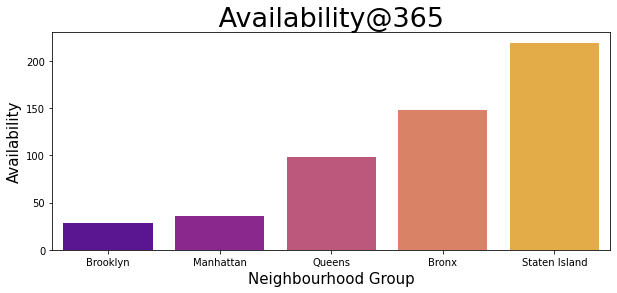

In [ ]:
plt.figure(figsize=(10,4))
plt5=sns.barplot(data=availability_by_area, x='neighbourhood_group',y='availability_365',palette='plasma')
plt5.set_xlabel("Neighbourhood Group",fontsize=15)
plt5.set_ylabel("Availability",fontsize=15)
plt5.set_title(" Availability@365 ",fontsize=27)
plt.show()

**Observations**:
 
 Tha availability of rooms in Manhattan are low, which is in contrast to the maximum host listings. This indicates that the more number of people have frequent visit here, resulting in less availability and higher price.
 
 

Now lets try to find the relationship between price and number of reviews

In [ ]:
price_review = airbnb_df1.groupby(['price'])['number_of_reviews'].max().reset_index()

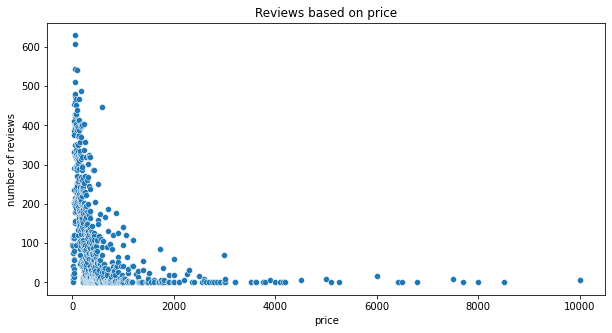

In [ ]:
plt.figure(figsize=(10,5))
plt6 = sns.scatterplot(x = 'price',y = 'number_of_reviews',data = price_review )
plt6.set_title('Reviews based on price')
plt6.set_xlabel('price')
plt6.set_ylabel("number of reviews")
plt.show()

Observation:
Scatterplot indicates that most number of people rely on budget friendly rooms. 

 
**Is there any noticeable difference of traffic among different areas and what could be the reason for it?** 

 To be in accordance with the previous findings More analysis is conducted taking number of reviews into consideration. 

<Figure size 720x720 with 0 Axes>

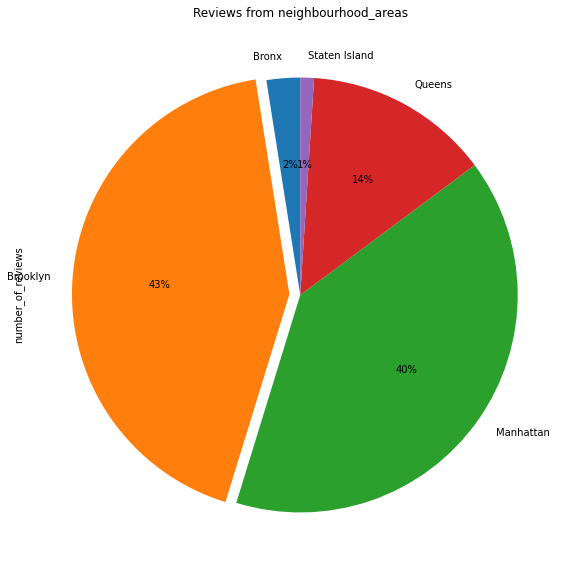

<Figure size 720x720 with 0 Axes>

In [ ]:
explode = (0,0.05,0,0,0)
airbnb_df1.groupby('neighbourhood_group')["number_of_reviews"].sum().plot(kind='pie',explode=explode,figsize=(10, 10), y='number_of_reviews',shadow=False,startangle=90, autopct='%1.0f%%',title='Reviews from neighbourhood_areas')
plt.figure(figsize=(10, 10))


From the above graph it is clear that both "Manhattan" and "Brooklyn" has got most number of reviews which strengthen our assumption that these areas are having high traffic.

In [ ]:
review_by_neighbourhood = airbnb_df1.groupby(by=["neighbourhood_group","neighbourhood"])["number_of_reviews"].sum().reset_index()
review_by_neighbourhood_df = review_by_neighbourhood.sort_values(by="number_of_reviews",ascending=False).head(10).reset_index(drop=True)
review_by_neighbourhood_df

,neighbourhood_group,neighbourhood,number_of_reviews
0,Brooklyn,Bedford-Stuyvesant,110352
1,Brooklyn,Williamsburg,85427
2,Manhattan,Harlem,75927
3,Brooklyn,Bushwick,52508
4,Manhattan,Hell's Kitchen,49940
5,Manhattan,East Village,44642
6,Manhattan,East Harlem,36440
7,Brooklyn,Crown Heights,36408
8,Manhattan,Upper West Side,36058
9,Manhattan,Upper East Side,31686


From this top 10 results it is also very clear that neighbourhoods belongs to "brooklyn and "manhattan" has got more reviews.

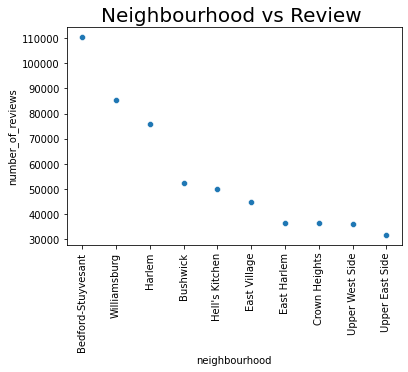

In [ ]:
plt7= sns.scatterplot(x=review_by_neighbourhood_df.neighbourhood[:10], y=review_by_neighbourhood_df.number_of_reviews[:10]) 
plt.xticks(rotation=90)
plt7.set_title("Neighbourhood vs Review ",fontsize=20)
plt.show()



```
# This is formatted as code
```

The graph visualized that "Beford-Stuyvesant" and "Williamsburg"have more reviews denoting greater traffic  

**CONCLUSIONS:**
 It is clearly evident from results that 7 values are from Manhattan area,2 from Brooklyn and 1 from Queens from the 10 highest considered calculated_host_listings_count observations.
It specifies that airbnb is a popular businesss model in manhattan with sonder (NYC) having higher host_listings. And also busiest hosts accounting for 8 results are from private room type.
The greater reviews are from queens with Dona as the busiest host.Greater reviews aroused from private rooms over shared rooms denoting the prefrence of former by most of the people.
In manhattan we find the costly hosts. Whereas, the room availability is higher in "Staten Island" which is available for 246 days in each year on average. In contrast, the lesser availability is in "Brooklyn" whrere it is available for 93 days.
Furthermore, the room availability in manhattan are few denoting it as a busiest place and higher price area.




